# Clasificación con SVC Lineal con el dataset Digits de scikit-learn normalizando los datos y después usando RBFSampler para los datos

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

## Información del dataset

Casi 1800 imágenes de 8x8 con los dígitos 0..9. Cada píxel se representa con un número entre 0..15, que es un color en la escala de grises.

En este notebook se hará el training con los datos normalizados, igual que hacen en algunos ejemplo de scikit-learn (dividen cada fila por 16 y luego le restan la media) y después se usará el RBFSampler para generar datos nuevos. Para ver otras variantes, estará en otro notebook.

In [1]:
from sklearn.datasets import load_digits
#from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler

In [2]:
import math
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
digits = load_digits()

In [5]:
data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [6]:
data /= 16
data -= data.mean(axis = 0)

La media la hace por columnas, por píxel. Es decir, el vector de medias tiene 64 elementos, uno por cada posición en la foto.

In [7]:
sampler = RBFSampler(n_components = 1000)

In [8]:
sampler.fit(data)

RBFSampler(gamma=1.0, n_components=1000, random_state=None)

In [9]:
data = sampler.transform(data)

In [10]:
data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

## Varias ejecuciones y hacer la media

In [11]:
n_runs = 5
train_scores = []
test_scores = []

In [12]:
for i in range(n_runs):
    #clf = DecisionTreeClassifier()
    clf = LinearSVC()
    clf.fit(data_train, target_train)
    train_score = clf.score(data_train, target_train)
    test_score = clf.score(data_test, target_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

In [13]:
print("Mean of test scores:",np.mean(test_scores))
print("Mean of train scores:", np.mean(train_scores))

Mean of test scores: 0.8046744574290484
Mean of train scores: 1.0


In [14]:
print("Standard deviation of test scores:",np.std(test_scores))
print("Standard deviation of train scores:",np.std(train_scores))

Standard deviation of test scores: 0.0
Standard deviation of train scores: 0.0


## ¿Como cambia accuracy si incrementamos la cantidad de features extraídas?

In [105]:
digits = load_digits()

In [106]:
data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [107]:
data /= 16
data -= data.mean(axis = 0)

In [108]:
#target_train = target[:N_train]
#target_test = target[N_train:]

In [109]:
components = 30 * np.arange(15) + 50
scores = []
n_runs = 3

In [110]:
for comp in components:
    sampler = RBFSampler(n_components=comp)
    
    # Samplear los datos
    indices = np.arange(len(data))
    indices = np.random.choice(indices, len(indices), replace = False) # Mezclar los indices
    train_indices = indices[:N_train] # Los N_train primeros son de train
    test_indices = indices[N_train:] # El resto son de test
    dat = np.take(data, indices, axis = 0)
    targ = np.take(target, indices, axis = 0)
    
    sampler.fit(dat)
    dat = sampler.transform(dat)
    
    dat_train = np.take(dat, train_indices, axis = 0)
    targ_train = np.take(targ, train_indices, axis = 0)

    dat_test = np.take(dat, test_indices, axis = 0)
    targ_test = np.take(targ, test_indices, axis = 0)
    
    #sampler.fit(data)
    #dat = sampler.transform(data)
    #dat_train = dat[:N_train]
    #dat_test = dat[N_train:]
    #clf = DecisionTreeClassifier()
    clf = LinearSVC()
    clf.fit(dat_train, targ_train)
    sc = 0
    for i in range(n_runs):
        sc += clf.score(dat_test, targ_test)
    sc /= n_runs
    scores.append(sc)

Text(0,0.5,'Accuracy achieved')

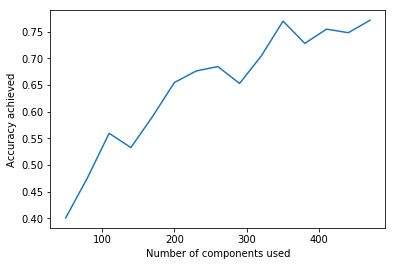

In [111]:
plt.plot(components, scores)
plt.xlabel("Number of components used")
plt.ylabel("Accuracy achieved")

In [112]:
print("Maximum achieved score:",np.max(scores))
print("Minimum achieved score:",np.min(scores))

Maximum achieved score: 0.7712854757929883
Minimum achieved score: 0.4006677796327212


## Repetimos el bucle anterior, pero sin resamplear, usando siempre los mismo datos

Lo que sigue ya no hace ninguna falta. Era para hacer pruebas, pero me da miedo borrarlo. Lo dejo por si acaso

In [94]:
digits = load_digits()

In [95]:
data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

El plot de abajo muestra que el dataset original no está ordenado de ninguna manera

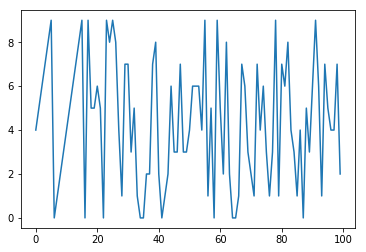

In [96]:
x = 100 * 4
plt.plot(target[x:x + 100])
#plt.plot(target)

In [97]:
data /= 16
data -= data.mean(axis = 0)

In [98]:
ind = np.arange(N)
ind = np.random.choice(ind, len(ind), replace = False)
data = np.take(data, ind, axis = 0)
target = np.take(target, ind, axis = 0)

In [99]:
target_train = target[:N_train]
target_test = target[N_train:]

In [100]:
components = 30 * np.arange(30) + 50
scores = []
n_runs = 3

In [101]:
for comp in components:
    sampler = RBFSampler(n_components=comp)
    sampler.fit(data)
    dat = sampler.transform(data)
    dat_train = dat[:N_train]
    dat_test = dat[N_train:]
    #clf = DecisionTreeClassifier()
    clf = LinearSVC()
    clf.fit(dat_train, target_train)
    sc = 0
    for i in range(n_runs):
        sc += clf.score(dat_test, target_test)
    sc /= n_runs
    scores.append(sc)

Text(0,0.5,'Accuracy achieved')

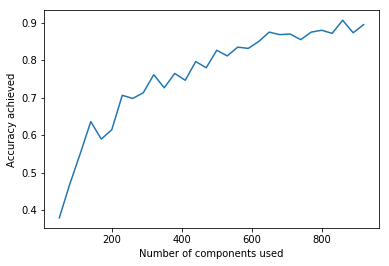

In [102]:
plt.plot(components, scores)
plt.xlabel("Number of components used")
plt.ylabel("Accuracy achieved")

In [103]:
print("Maximum achieved score:",np.max(scores))
print("Minimum achieved score:",np.min(scores))

Maximum achieved score: 0.9065108514190318
Minimum achieved score: 0.3789649415692821


### Conclusiones

En este caso puede observarse claramente como incrementar la cantidad de features extraídas incrementa la accuracy obtenida. Este comportamiento no lo observabamos con el DecisionTree, al menos no de forma tan exagerada.